## Seaborn for Data Analysis ##
[Seaborn Documentation](https://seaborn.pydata.org/)

[Seaborn Built In Data Sets](https://github.com/mwaskom/seaborn-data)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print(sns)

<module 'seaborn' from '/home/martin/.local/lib/python3.6/site-packages/seaborn/__init__.py'>


In [3]:
df = pd.read_csv('/home/martin/datasets/flights.csv')[:10000]
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


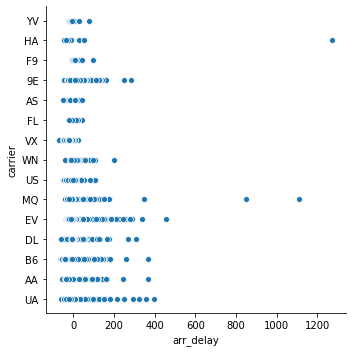

In [4]:
sns.relplot(x='arr_delay', y='carrier', data=df)

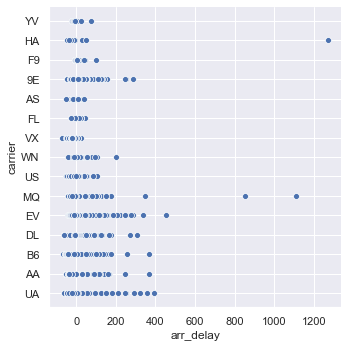

In [5]:
sns.set()
sns.relplot(x='arr_delay', y='carrier', data=df)

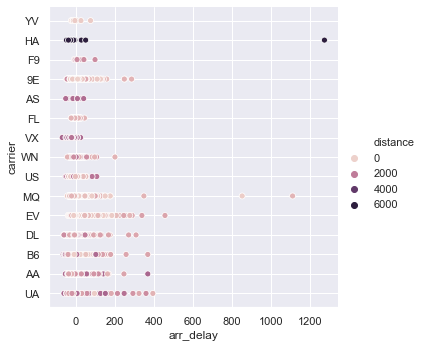

In [6]:
sns.relplot(x="arr_delay", y="carrier", hue='distance', data=df)

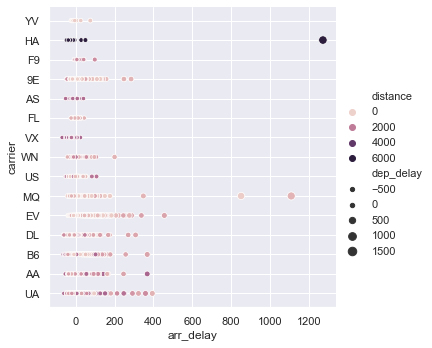

In [7]:
sns.relplot(x="arr_delay", y="carrier", hue='distance', size='dep_delay', data=df)

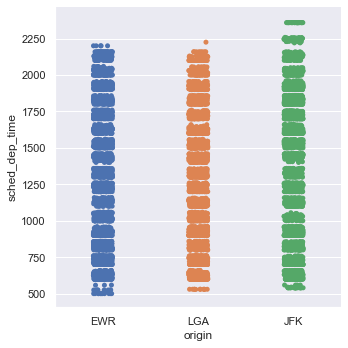

In [8]:
airports_df = df[
        (df['origin'] == 'JFK')
        | (df['origin'] == 'LGA')
        | (df['origin'] == 'EWR')
       ]
sns.catplot(x='origin', y='sched_dep_time', data=airports_df)


### [Catplot docs](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot)###

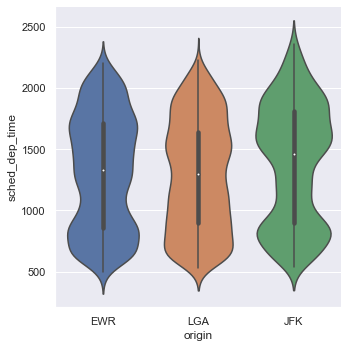

In [9]:
sns.catplot(x='origin', y='sched_dep_time', kind='violin', data=airports_df)

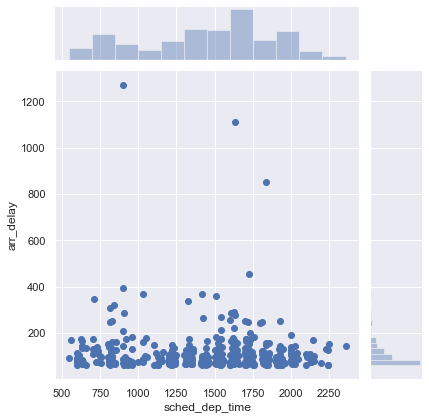

In [10]:
hour_delay = df[df['arr_delay'] > 60]
sns.jointplot(x="sched_dep_time", y="arr_delay", data=hour_delay)

### [Jointplot docs](https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot)###

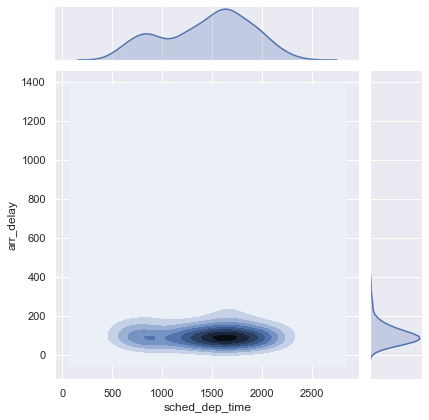

In [11]:
sns.jointplot(x="sched_dep_time", y="arr_delay", data=hour_delay, kind='kde')

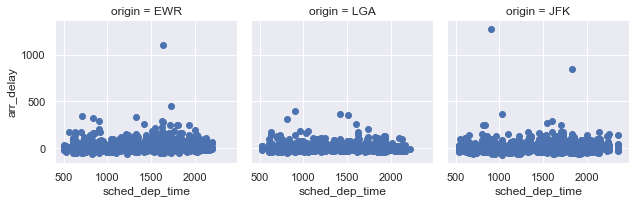

In [12]:
g = sns.FacetGrid(airports_df, col='origin')
g.map(plt.scatter, 'sched_dep_time', 'arr_delay')

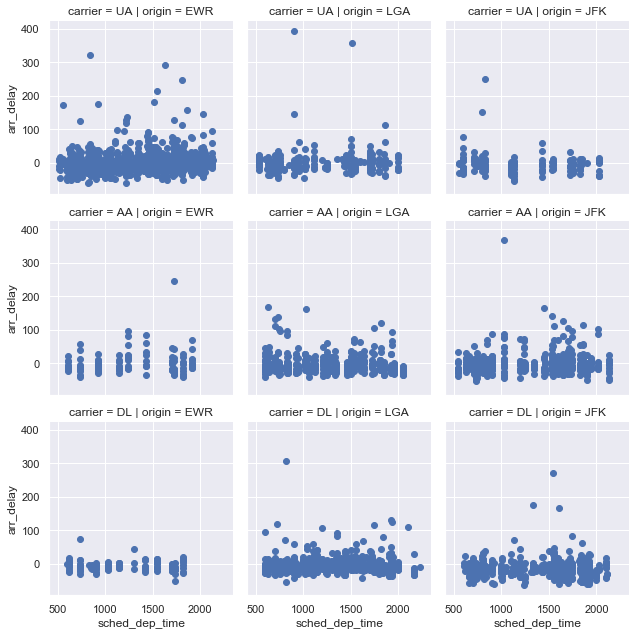

In [13]:
carriers_and_origins = df[
    (
        (df['origin'] == 'JFK')
        | (df['origin'] == 'LGA')
        | (df['origin'] == 'EWR')
    ) & (
        (df['carrier'] == 'DL' )
        |(df['carrier'] == 'AA' )
        |(df['carrier'] == 'UA' )
    )
       ]
g = sns.FacetGrid(carriers_and_origins, col='origin', row='carrier')
g.map(plt.scatter, 'sched_dep_time', 'arr_delay')

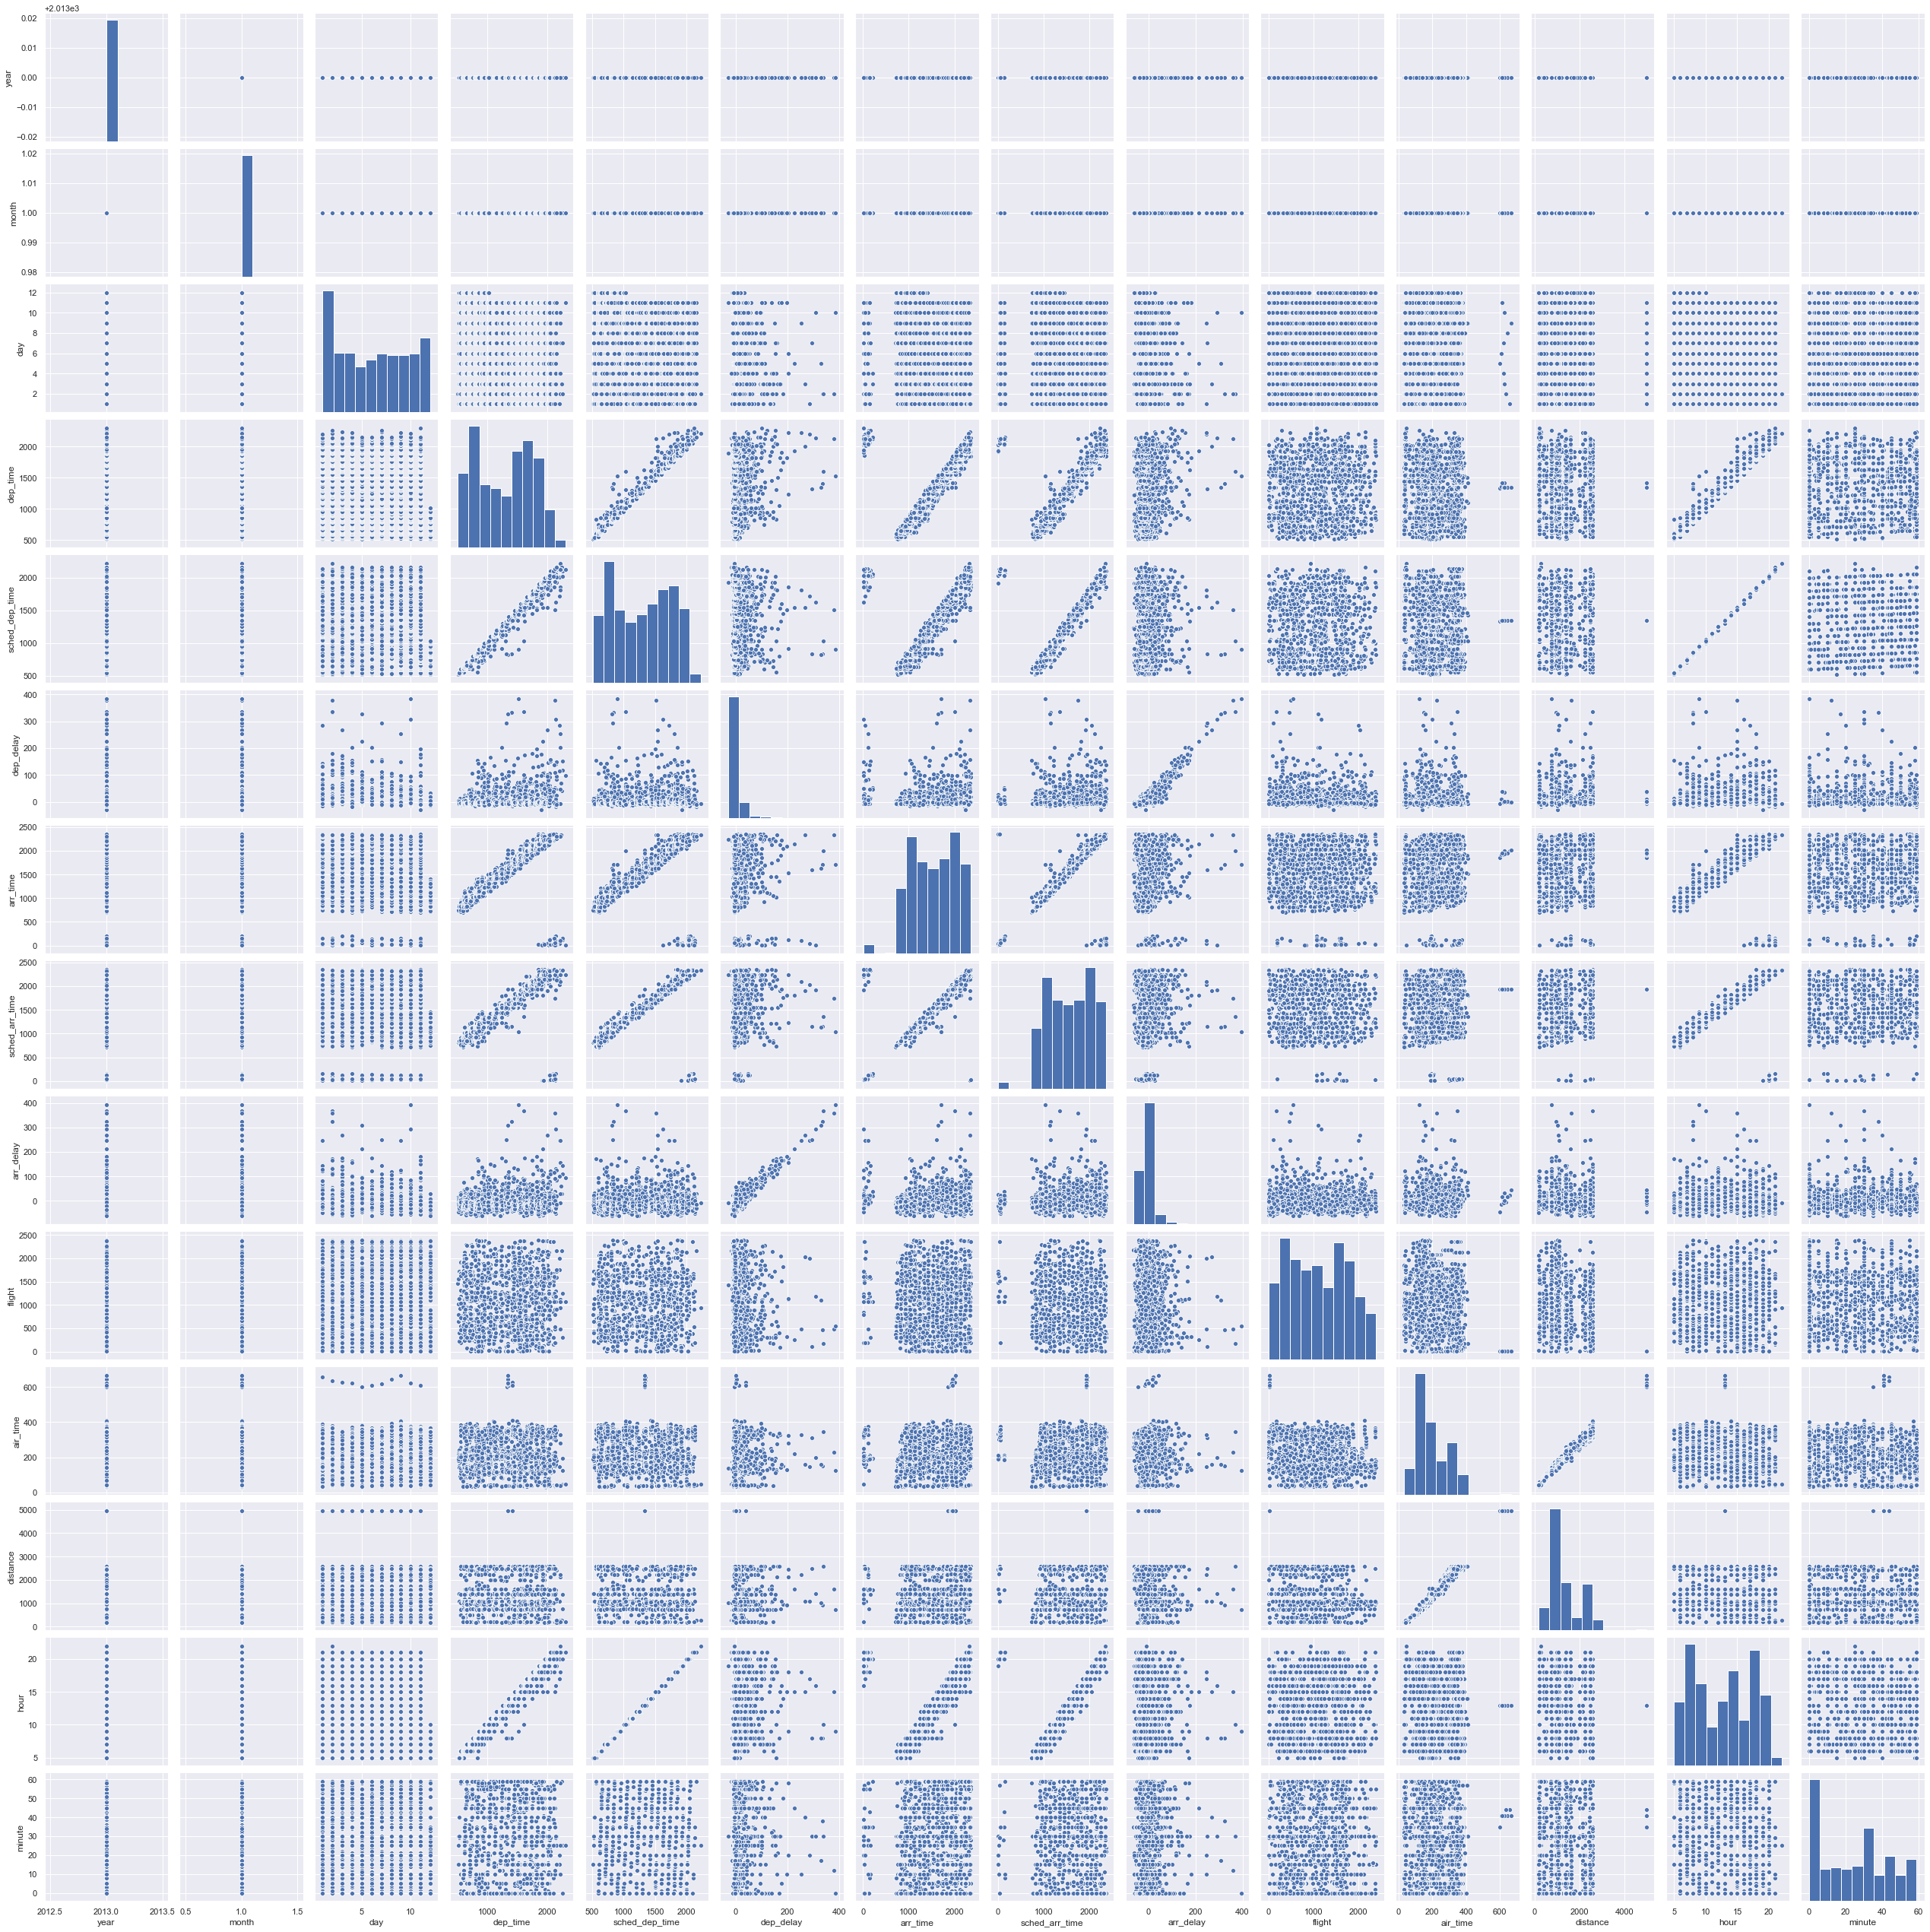

In [14]:
sns.pairplot(carriers_and_origins)

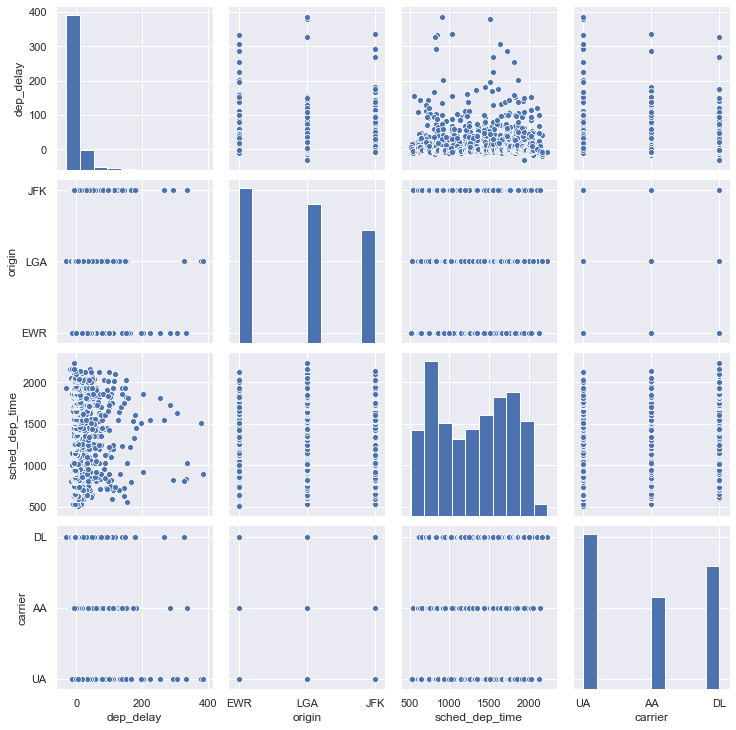

In [15]:
sns.pairplot(carriers_and_origins, vars=['dep_delay', 'origin', 'sched_dep_time', 'carrier'])

### [Documentation on Aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html) ###